In [1]:

# Loading libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import scipy.stats as stats
import re
%matplotlib inline


In [2]:
def freq_count_pct(df,ex):
    t_o_y = df[ex]
    a_d_c = t_o_y.value_counts(normalize=True).to_frame()
    a_d_c.reset_index(inplace=True)
    a_d_c.columns = [ex, 'PERCENT_OCCURANCE']
    a_d_c['PERCENT_OCCURANCE'] = 100 * a_d_c['PERCENT_OCCURANCE'] 
    return a_d_c
# This gets the frequency of an occurance of a category , turns each into a percentage, then creates a new column for the count. 
def freq_count_pct_plt(df,ex):
    t_o_y = df[ex]
    a_d_c = t_o_y.value_counts(normalize=True).to_frame()
    a_d_c.reset_index(inplace=True)
    a_d_c.columns = [ex, 'PERCENT_OCCURANCE']
    a_d_c['PERCENT_OCCURANCE'] = 100 * a_d_c['PERCENT_OCCURANCE']        
    return a_d_c.plot(x=ex, y='PERCENT_OCCURANCE', kind="bar")
# This gets the frequency of an occurance of a category , turns each into a percentage, then gives a bar graph. 
def freq_count(df,ex):
    t_o_y = df[ex]
    a_d_c = t_o_y.value_counts().to_frame()
    a_d_c.reset_index(inplace=True)
    a_d_c.columns = [ex, 'OCCURANCE']
    return a_d_c

In [3]:
# Loading Data Files

df_311_2011 = pd.read_csv("citizen311data_2011_0.csv")

# Tempeture Data
# Historical Temp Data for Jefferson County retreived from 
# https://power.larc.nasa.gov/downloads/POWER_Regional_Daily_20110101_20111231_b287c874.csv
# Bottom-left   Latitude:  38.0740  Longitude:  -85.9480
# Upper-right  Latitude:  38.4170  Longitude:  -85.3830
# Time Extent:   01/01/2011  -  12/31/2011

df_weatherdata_2011 = pd.read_csv("2011_TempData.csv", header=None, skiprows= 17)


In [4]:
# Sorted Temperature readings and choose the more centrally located point offered 
# by the NASA service. 
df_2011_weather_75 = df_weatherdata_2011[df_weatherdata_2011[1] == '-85.75']

In [5]:
# get diminsions for map boundry box

BBox = ((df_311_2011.longitude.min(), df_311_2011.longitude.max(), df_311_2011.latitude.min(), df_311_2011.latitude.max()))
service_name = list(df_311_2011['service_name'].value_counts().index)

In [6]:
# Splitting up date to make it eaiser to work with

df_311_2011[['Date','Time']] = df_311_2011["requested_datetime"].str.split(" ", expand=True)
df_311_2011[['YEAR', 'MO', 'DY']] = df_311_2011["Date"].str.split('-', expand=True)

In [7]:
df_311_2011.head()

,council_district,service_request_id,address,agency_responsible,description,service_name,source,status,closed_datetime,updated_datetime,longitude,latitude,requested_datetime,Date,Time,YEAR,MO,DY
0,6.0,3797149,"1212 W BROADWAY , LOUISVILLE, KY, 40203",LPM,"OWNER REQUEST TO CUT , TRIM , REMOVE, PLANT, E...",STR TREE EVAL,UNKNOWN,CLOSED,NaN,NaN,-85.772095,38.247236,2011-01-01 09:40:00+00,2011-01-01,09:40:00+00,2011,01,01
1,4.0,3797151,"1002 W JEFFERSON ST , LOUISVILLE, KY, 40203",METRO POLICE DEPARTMENT,"ABANDONED VEHICLE ROW, STREET, ALLEY, AVROW, ...",ABANDON VEHICLE,UNKNOWN,CLOSED,NaN,NaN,-85.767282,38.254738,2011-01-01 10:12:00+00,2011-01-01,10:12:00+00,2011,01,01
2,10.0,3797161,"914 ARDMORE DR , LOUISVILLE, KY, 40217",SWMS - WASTE COLLECTION,"YARD WASTE MISSED, YARDM, SWMS",YARD WASTE MISS,UNKNOWN,CLOSED,NaN,NaN,-85.732925,38.215074,2011-01-01 12:55:00+00,2011-01-01,12:55:00+00,2011,01,01
3,21.0,3797163,"4322 CAVELLE AVE , LOUISVILLE, KY, 40213",LPM,"STREET POTHOLE, POTHL",STREET POTHOLE,UNKNOWN,CLOSED,NaN,NaN,-85.715530,38.189648,2011-01-01 13:01:00+00,2011-01-01,13:01:00+00,2011,01,01
4,19.0,3797165,"14600 AIKEN RD , LOUISVILLE, KY, 40245",SWMS - WASTE COLLECTION,"DEAD ANIMAL, ANIMD, SWMS",DEAD ANIMAL,UNKNOWN,CLOSED,NaN,NaN,-85.483100,38.270909,2011-01-01 13:25:00+00,2011-01-01,13:25:00+00,2011,01,01


In [8]:
# Getting the frequency of type of service request

df_count = df_311_2011['service_name'].value_counts()

In [9]:
# put column names in geographically seperated weather data

df_2011_weather_75.columns = df_weatherdata_2011.iloc[0]

In [10]:
# Combined the Data from both dataframes, now weather data is displayed with report. 
# Merge Temp Data with Louisville service data. 

merged_df = pd.merge(df_311_2011, df_2011_weather_75, how='inner',on=['MO','DY']) 

In [11]:
# Seperate out district five from merged_df
categories_dist_five = merged_df[merged_df['council_district'] == 5]
categories_dist_five.head()

,council_district,service_request_id,address,agency_responsible,description,service_name,source,status,closed_datetime,updated_datetime,...,LON,YEAR_y,T2M_RANGE,TS,T2MWET,T2M_MAX,PRECTOT,PS,T2M,RH2M
17,5.0,3797192,"742 DEARBORN AVE , LOUISVILLE, KY, 40211",METRO POLICE DEPARTMENT,"ABANDONED VEHICLE ROW, STREET, ALLEY, AVROW, ...",ABANDON VEHICLE,UNKNOWN,CLOSED,NaN,NaN,...,-85.75,2011,6.55,-3.66,-8.12,0.37,0.00,100.00,-3.84,69.17
89,5.0,3797293,"416 N 38TH ST , LOUISVILLE, KY, 40212",METRO POLICE DEPARTMENT,"ABANDONED VEHICLE ROW, STREET, ALLEY, AVROW, ...",ABANDON VEHICLE,UNKNOWN,CLOSED,NaN,NaN,...,-85.75,2011,11.26,-2.39,-6.62,4.17,0.00,99.85,-2.17,69.65
97,5.0,3797302,"3111 PORTLAND AVE 2, LOUISVILLE, KY, 40212",IPL-PROPERTY MAINTENANCE DIV.,"INTERIOR VIOLATION, INCLUDES NO HEAT, ELECTRIC...",INTERIOR VIOL,UNKNOWN,CLOSED,NaN,NaN,...,-85.75,2011,11.26,-2.39,-6.62,4.17,0.00,99.85,-2.17,69.65
111,5.0,3797319,"3402 PFLANZ AVE , LOUISVILLE, KY, 40212",SWMS - ADMINISTRATION,"DAMAGED GARBAGE CART, CARTD, SWMS",DAMAGE GARB CART,UNKNOWN,CLOSED,NaN,NaN,...,-85.75,2011,11.26,-2.39,-6.62,4.17,0.00,99.85,-2.17,69.65
133,5.0,3797352,"345 N 22ND ST , LOUISVILLE, KY, 40212",SWMS - WASTE COLLECTION,"GARBAGE MISSED, GARBM, SWMS",GARBAGE MISSED,UNKNOWN,CLOSED,NaN,NaN,...,-85.75,2011,11.26,-2.39,-6.62,4.17,0.00,99.85,-2.17,69.65


In [12]:
# create dataframe that shows the amount of calls per district

calls_district = merged_df['council_district'].value_counts(normalize=True).to_frame()
calls_district.reset_index(inplace=True)
calls_district.columns

Index(['index', 'council_district'], dtype='object')

<AxesSubplot:xlabel='index'>

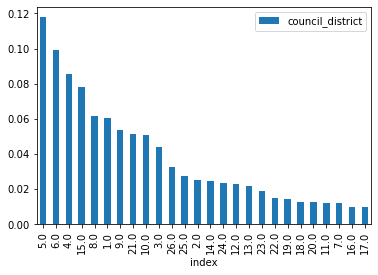

In [13]:
#  This graph illustrates the city council districts for the City of Louisville on the X axis 
#  and percentage of total service calls from that district for the year 2011.  We can see that
#  the 5th district had the most calls during that period. 

calls_district.plot(x ='index', y='council_district', kind = 'bar')

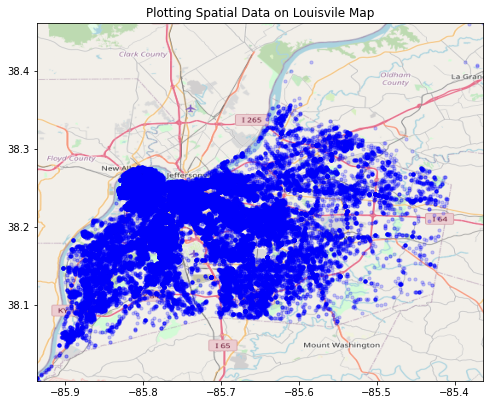

In [14]:
# get map ready
# This is overall calls in the the City of Louisville in 2011, we can see that service calls are more frequent in 
# some parts of the city than others.

lou_map = plt.imread('lou_map.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_311_2011.longitude, df_311_2011.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Louisvile Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(lou_map, zorder=0, extent = BBox, aspect= 'equal')

In [15]:
# Get frequency of types of service calls

type_count = categories_dist_five['service_name'].value_counts()

In [16]:
# Convert Service call data with a usable index

categories_dist_five_filter = categories_dist_five['service_name'].value_counts(normalize=False).to_frame()
categories_dist_five_filter.reset_index(inplace=True)
categories_dist_five_filter


,index,service_name
0,OPEN REFERRAL,1849
1,HIGH GRASS WEEDS,1655
2,EXTERIOR VIOL,912
3,JUNK VIOLATION,583
4,GARBAGE MISSED,566
...,...,...
79,BANNER REPAIR,1
80,SUGGESTION,1
81,BIKE PEDESTRIAN,1
82,DUST,1


<AxesSubplot:xlabel='Date'>

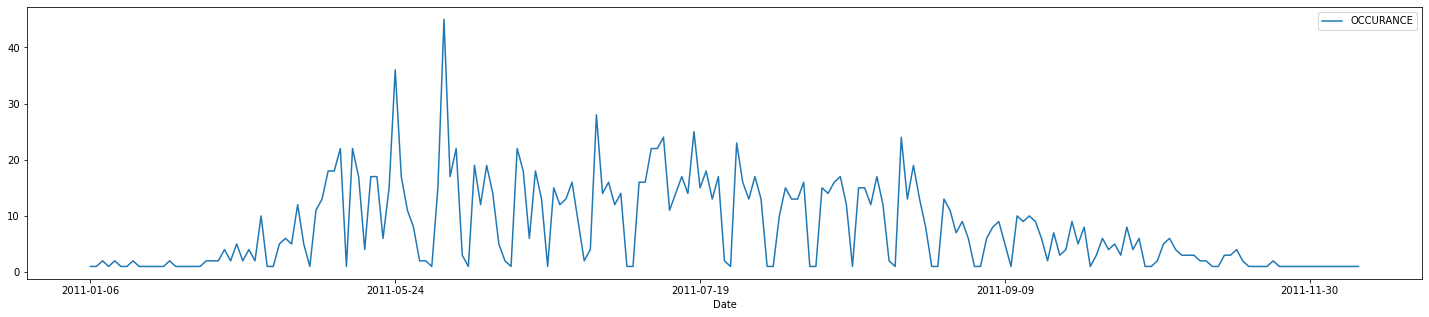

In [17]:
# The Frequency of calls for high weeds over time. 

df_311_2011_1 = df_311_2011[df_311_2011['council_district'] == 5.0]
service_name_occ = freq_count(df_311_2011_1, "service_name")
weeds_in_five = df_311_2011.query('council_district=="5.0" & service_name=="HIGH GRASS WEEDS"')
weeds_in_five_1 = freq_count(weeds_in_five, "Date")
weeds_in_five_1 = weeds_in_five_1.sort_values(by='Date')
weeds_in_five_1.interpolate().plot(x='Date',y='OCCURANCE', kind="line", figsize=(25, 5))

In [18]:
max_temps_per_day = categories_dist_five.groupby('Date')
max_temps_per_day

In [19]:
# Create a dataframe for correlation. 
max_temps_per_day_maxed = max_temps_per_day.max('T2M_MAX')
max_temps_per_day_maxed = max_temps_per_day_maxed.reset_index()
max_temp = categories_dist_five.groupby(['Date'])["T2M_MAX"].max()
max_temps_per_day_maxed = max_temp.reset_index()
correlation_table = pd.merge( max_temps_per_day_maxed, weeds_in_five_1, on='Date')

In [20]:
correlation_table

,Date,T2M_MAX,OCCURANCE
0,2011-01-06,4.49,1
1,2011-01-10,0.70,1
2,2011-01-19,1.76,2
3,2011-02-15,5.74,1
4,2011-02-16,17.19,2
...,...,...,...
204,2011-12-20,12.70,1
205,2011-12-21,13.53,1
206,2011-12-23,6.08,1
207,2011-12-27,2.08,1


In [23]:

# Finally, lets find the correlation between the temperature data and the frequency of calls using a kendall correlation.


df_col_1 = correlation_table['T2M_MAX']
df_col_2 = correlation_table['OCCURANCE']
df_col_1.corr(df_col_2, method='kendall')

0.3780949478334775

In [26]:
# We have a kendall correlation coefficient of .38, which is weak positive correlation, and can be also be considered no correlation. 
# This means that there may be little to no impact of temperature on the number of calls in a given day for Louisville Metro District 5.
# Further analysis is warranted. 
